In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
main=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\jasobanta  das\Python Libraries\New data\maintenance_data.csv")
main

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


In [4]:
main.isnull().sum()

lifetime          0
broken            0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
dtype: int64

In [5]:
main.dtypes

lifetime            int64
broken              int64
pressureInd       float64
moistureInd       float64
temperatureInd    float64
team               object
provider           object
dtype: object

In [6]:
for i in main:
    print(i,":",main[i].unique(),"\n")

lifetime : [56 81 60 86 34 30 68 65 23 38 29 82 80 48 92 88 74 61 35 26 63 79 53 73
 13 36 31 25 58 19 84 12 15 43  1 20 16  3 18  7 47 39 57  4 24 28 49 76
 52  8 40 46  5 41 93 77 62 85 55 33 17 45  9 72 50 42 44 54 64 27 22 59
 66 83 14 51 71 21 78  6 69 89  2 67 87 11 10 32 37 90] 

broken : [0 1] 

pressureInd : [ 92.17885406  72.07593772  96.27225443  94.40646126  97.75289859
  87.67880097  94.61417404  96.48330289 105.486158    99.17823531
  97.81784409  67.81225145  86.36611059  76.14465414 103.1072633
  88.41407945  84.35504868  79.66925455  86.22910861  84.17942039
 100.0059233  115.6075596   97.69718903 101.4156229  118.9786971
 102.1127749  129.1243378  109.0330362  107.2980695  127.2639544
 138.1911205   72.55408417  95.21464918  91.24713174  81.55537698
  69.13459519 132.8574784   54.73533145  84.89864628  94.15228726
  84.34406647  95.75352436 123.9284399  101.5053508  120.9455502
  83.06857115 113.3491219   75.64669299 113.4358321   81.77978353
  68.85065142 150.665421 

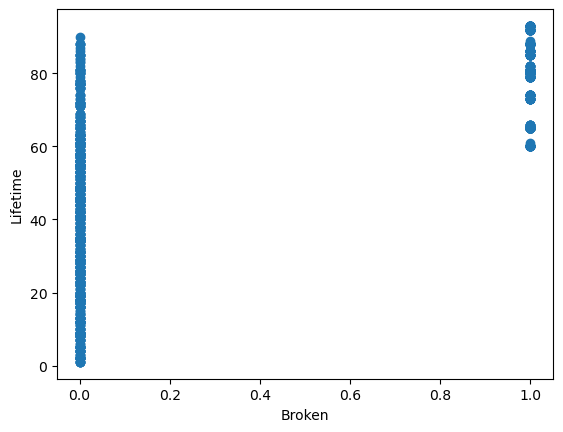

In [7]:
plt.scatter(main["broken"],main["lifetime"])
plt.xlabel("Broken")
plt.ylabel("Lifetime")
plt.show()

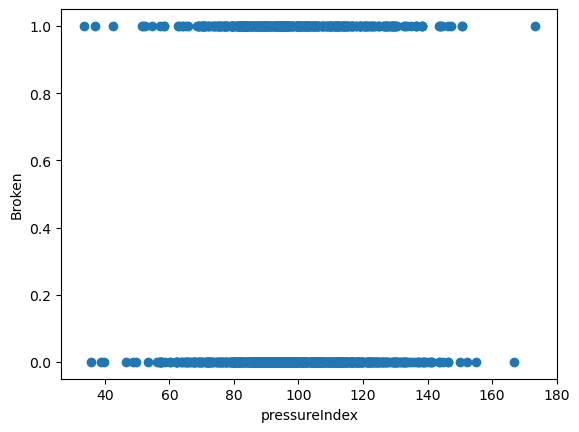

In [8]:
plt.scatter(main["pressureInd"],main["broken"])
plt.xlabel("pressureIndex")
plt.ylabel("Broken")
plt.show()

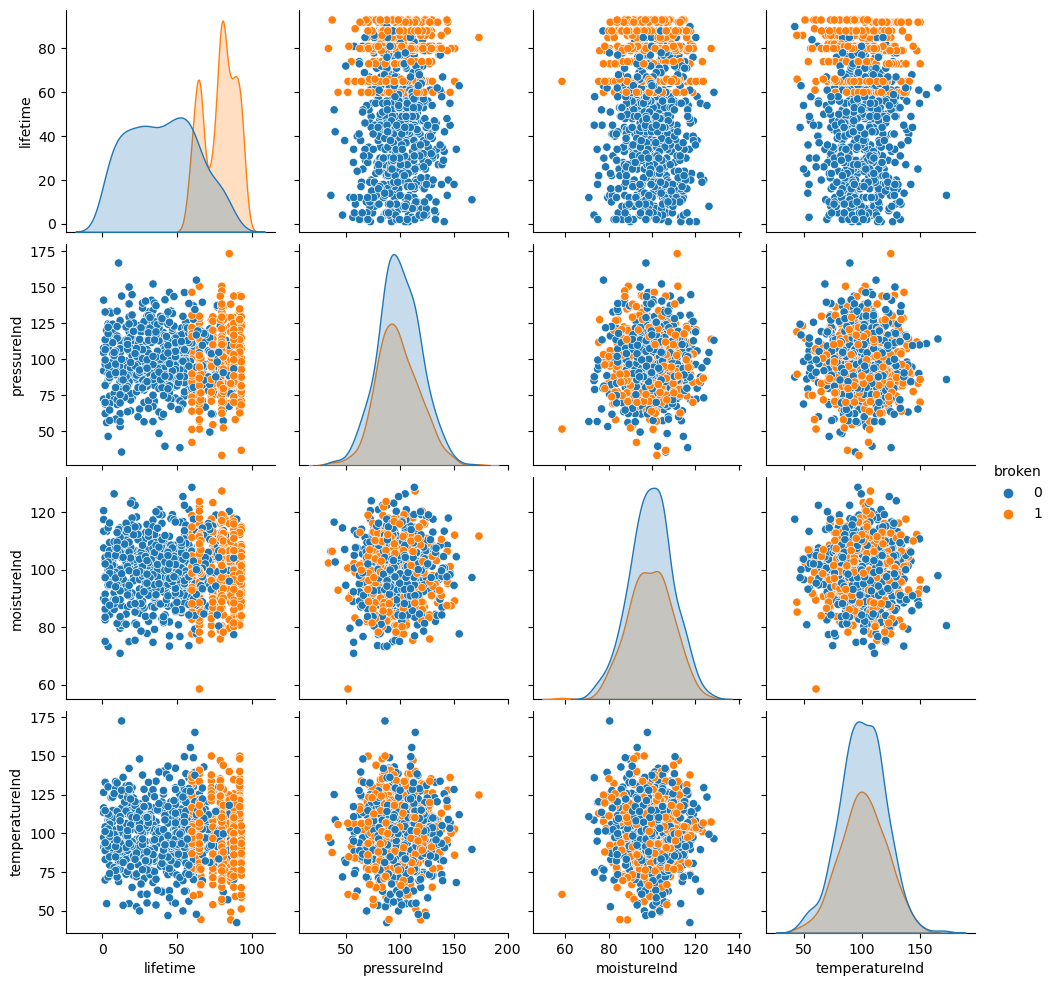

In [9]:
a=sns.pairplot(main[["lifetime","broken","pressureInd","moistureInd","temperatureInd","team","provider"]],hue="broken")
a

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
for i in ["team","provider"]:
    main[i]=le.fit_transform(main[i])

In [12]:
ip=main.drop(["broken"],axis=1)
op=main.broken

In [13]:
ip

,lifetime,pressureInd,moistureInd,temperatureInd,team,provider
0,56,92.178854,104.230204,96.517159,0,3
1,81,72.075938,103.065701,87.271062,2,3
2,60,96.272254,77.801376,112.196170,0,0
3,86,94.406461,108.493608,72.025374,2,1
4,34,97.752899,99.413492,103.756271,1,0
...,...,...,...,...,...,...
995,88,88.589759,112.167556,99.861456,1,3
996,88,116.727075,110.871332,95.075631,0,3
997,22,104.026778,88.212873,83.221220,1,0
998,78,104.911649,104.257296,83.421491,0,3


In [14]:
op

0      0
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    0
998    0
999    0
Name: broken, Length: 1000, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(ip,op,train_size=0.8)

In [41]:
xtrain

,lifetime,pressureInd,moistureInd,temperatureInd,team,provider
767,77,100.103184,105.244922,100.095615,2,1
976,86,83.276925,109.779808,101.179966,2,1
684,56,105.646762,99.505973,73.962761,1,2
902,60,89.953376,88.167348,116.543425,2,2
856,34,96.422192,98.227509,95.260373,1,0
...,...,...,...,...,...,...
641,7,103.919882,104.467181,114.686022,0,0
50,80,68.850651,106.214236,115.711970,1,0
487,62,94.602399,99.904179,76.538349,2,0
450,81,121.691152,96.448210,108.489184,2,3


In [42]:
xtest

,lifetime,pressureInd,moistureInd,temperatureInd,team,provider
455,51,112.205919,101.936528,116.034736,1,2
14,82,103.107263,103.673197,79.504532,2,3
786,10,122.789816,81.322687,87.056552,1,2
16,48,84.355049,103.174919,102.399715,2,2
919,65,104.540168,108.420157,104.406256,1,2
...,...,...,...,...,...,...
558,22,87.669823,122.359125,89.431358,2,1
732,60,70.364589,104.683509,93.464386,2,2
225,65,101.749202,92.014528,103.765407,0,2
302,60,118.033622,98.528041,131.592075,2,2


In [43]:
ytrain

767    0
976    1
684    0
902    1
856    0
      ..
641    0
50     1
487    0
450    1
847    0
Name: broken, Length: 800, dtype: int64

In [44]:
ytest

455    0
14     1
786    0
16     0
919    0
      ..
558    0
732    1
225    1
302    1
894    0
Name: broken, Length: 200, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [21]:
xtrain=sc.fit_transform(xtrain)

In [22]:
xtrain

array([[-1.10698639,  0.47254509,  0.68813536, -0.6703746 , -1.21872933,
        -1.30742097],
       [ 0.96030282, -1.32258193,  0.36023206, -0.65685512,  1.2876549 ,
         1.39758793],
       [-0.24248363,  0.80825024, -0.59766973, -2.29668591, -1.21872933,
         0.4959183 ],
       ...,
       [ 0.3589096 , -0.00906063,  0.16345234,  0.02565434, -1.21872933,
         0.4959183 ],
       [-1.97148914, -2.11581604, -1.05495243, -0.20803596,  1.2876549 ,
        -1.30742097],
       [ 0.39649667, -1.0884661 ,  1.06426435, -1.19072124,  0.03446278,
         0.4959183 ]])

In [23]:
xtext=sc.transform(xtest)
xtest

,lifetime,pressureInd,moistureInd,temperatureInd,team,provider
133,88,143.864742,95.877740,117.161092,0,3
866,36,117.022194,91.273905,99.183992,1,2
365,29,80.782245,94.553843,87.473713,2,1
893,27,100.460183,98.821303,76.443343,1,2
270,35,81.948552,109.631449,89.603367,2,3
...,...,...,...,...,...,...
671,31,114.023531,111.605584,108.894301,0,3
116,88,126.705862,92.441970,104.907187,0,3
703,88,110.009032,111.668187,108.566200,0,3
621,17,63.688295,87.040117,124.594330,1,1


In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [25]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [26]:
pred=lr.predict(xtext)
pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [27]:
ytest.head(10)

133    1
866    0
365    0
893    0
270    0
910    1
508    0
425    0
332    0
534    0
Name: broken, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(ytest,pred)
cm

array([[112,  17],
       [ 18,  53]], dtype=int64)

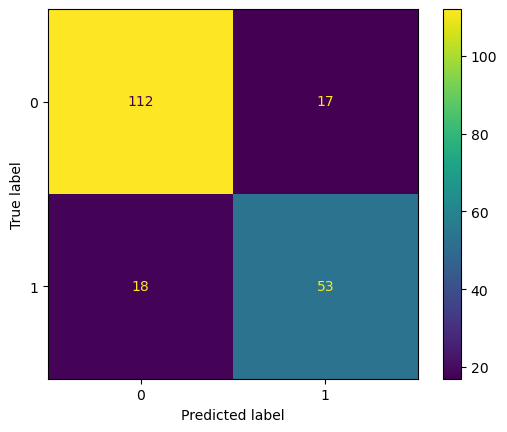

In [29]:
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [30]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc=accuracy_score(ytest,pred)
rec=recall_score(ytest,pred)
pre=precision_score(ytest,pred)
f1=f1_score(ytest,pred)

In [31]:
print(f"Accuracy score:{acc}\nRecall Score:{rec}\nprecision score:{pre} \nf1_score:{f1}")

Accuracy score:0.825
Recall Score:0.7464788732394366
precision score:0.7571428571428571 
f1_score:0.75177304964539


In [68]:
# plotting S-shape curve for classification model
df=pd.DataFrame({"ytest":list(ytest),"prediction":list(pred)})
df.head()

,ytest,prediction
0,0,1
1,1,0
2,0,0
3,0,0
4,0,0


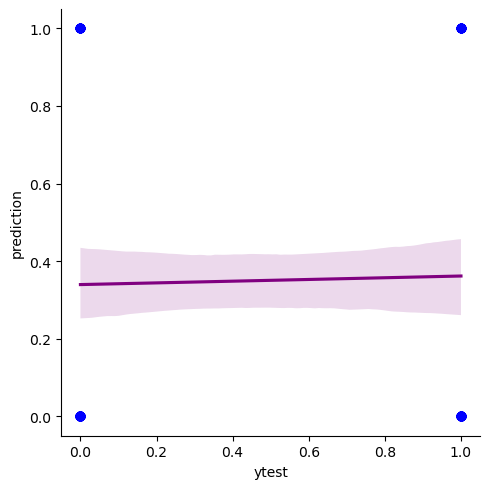

In [73]:
# to plot a logistic regression graph  we will use lmplot()
sns.lmplot(x="ytest",y="prediction",data=df,logistic=True,scatter_kws={"color": "blue"},line_kws={"color": "purple"} )
plt.show()

# KNN(K-NEAREST NEIGHBOR)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [47]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [48]:
pred1=knn.predict(xtest)
pred1

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(ytest,pred1)
cm

array([[93, 13],
       [18, 76]], dtype=int64)

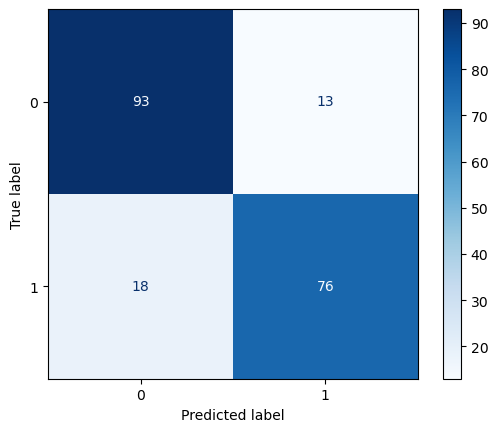

In [62]:
cmd=ConfusionMatrixDisplay(cm)
cmd.plot(cmap='Blues')
plt.show()

In [66]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc=accuracy_score(ytest,pred1)
rec=recall_score(ytest,pred1)
pre=precision_score(ytest,pred1)
f1=f1_score(ytest,pred1)

In [67]:
print(f"Accuracy score:{acc}\nRecall Score:{rec}\nprecision score:{pre} \nf1_score:{f1}")

Accuracy score:0.845
Recall Score:0.8085106382978723
precision score:0.8539325842696629 
f1_score:0.8306010928961749
